# Análisis de compañías del S&P 500

En el presente informe se toma en cuenta el indice S&P500.Este índice se basa en la capitalización bursátil de 500 grandes empresas que poseen acciones que cotizan en las bolsas NYSE o NASDAQ, y captura aproximadamente el 80% de toda la capitalización de mercado.
Se realiza un análisis sobre los distintas empresas a lo largo del tiempo para comprender mejor el mercado, y poder tomar decisiones en base a nuestras recomendaciones

### Se importan las librerías a utilizar

In [5]:
import pandas as pd
import requests as r
import yfinance as yf
import seaborn as sns
from matplotlib import pyplot as plt
import datetime as dt
import numpy as np
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import mean_historical_return

### Se obtiene la lista de los S&P500 de Wikipedia https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

In [6]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
pagina= r.get(url).content
lista_datos = pd.read_html(pagina)
type(lista_datos)
datos_wiki=lista_datos[0]


In [7]:
datos_wiki.head(10)

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981
5,ACN,Accenture,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
6,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,718877,2008
7,ADM,ADM,reports,Consumer Staples,Agricultural Products,"Chicago, Illinois",1981-07-29,7084,1902
8,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982
9,ADP,ADP,reports,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949


In [8]:
df_simbolos=datos_wiki.iloc[:,[0,1,3,4]]

Se conservan los datos de las columnas relevantes para este informe

In [169]:
print(df_simbolos)

    Ticker              Security             GICS Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                      GICS Sub-Industry  
0              Industrial Conglomerates  
1                     Building Products  
2                 Health Care Equipment  
3                       Pharmaceuticals  
4                 Health Care Equipment  
..                         

In [10]:
type(df_simbolos['Symbol'])

pandas.core.series.Series

In [11]:
#df_simbolos['Symbol']=df_simbolos['Symbol'].replace('.','-') 
df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


C:\Users\Diana\AppData\Local\Temp\ipykernel_9172\3397331766.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol
C:\Users\Diana\AppData\Local\Temp\ipykernel_9172\3397331766.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_simbolos['Symbol'] = df_simbolos['Symbol'].str.replace('.','-')      # Se reemplaza el '.' por '-' en la columna Symbol


In [12]:
df_simbolos.head(10)

,Symbol,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
5,ACN,Accenture,Information Technology,IT Consulting & Other Services
6,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
7,ADM,ADM,Consumer Staples,Agricultural Products
8,ADBE,Adobe Inc.,Information Technology,Application Software
9,ADP,ADP,Information Technology,Data Processing & Outsourced Services


In [13]:
#Se obtiene la lista de simbolos que se va a analizar
simbolos= df_simbolos['Symbol'].tolist()

In [14]:

print(simbolos)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK-B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF-B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'D

In [15]:
#Se descarga los datos de la API yahoo Finance usanado la libreria yfinance
df_data = yf.download(simbolos,start='2000-01-01',end='2020-12-31',group_by="ticker", threads=3)
df_data



[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- OGN: Data doesn't exist for startDate = 946702800, endDate = 1609390800
- CEG: Data doesn't exist for startDate = 946702800, endDate = 1609390800


TYL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2000-01-03    6.000000    6.125000    5.812500    5.875000    5.875000   
2000-01-04    6.000000    6.187500    5.937500    6.000000    6.000000   
2000-01-05    6.125000    6.250000    6.062500    6.187500    6.187500   
2000-01-06    6.250000    6.250000    6.000000    6.187500    6.187500   
2000-01-07    6.187500    6.250000    5.750000    5.937500    5.937500   
...                ...         ...         ...         ...         ...   
2020-12-28  439.739990  439.880005  429.029999  431.929993  431.929993   
2020-12-29  434.640015  434.839996  426.399994  429.369995  429.369995   
2020-12-30  432.399994  434.290009  428.420013  428.929993  428.929993   
2001-09-12         NaN         NaN         NaN         NaN         NaN   
2020-12-31         NaN         NaN         NaN         NaN         NaN   

                             IEX                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2000-01-03  138300.0   13.555556   13.555556   13.333333   13.416667  ...   
2000-01-04  135100.0   13.361111   13.361111   12.666667   12.805556  ...   
2000-01-05  187200.0   12.805556   12.861111   12.500000   12.750000  ...   
2000-01-06  107200.0   12.694444   12.944444   12.583333   12.750000  ...   
2000-01-07   78900.0   12.694444   13.166667   12.694444   13.111111  ...   
...              ...         ...         ...         ...         ...  ...   
2020-12-28  145100.0  197.500000  198.880005  195.539993  195.910004  ...   
2020-12-29  106000.0  196.429993  197.309998  193.059998  195.229996  ...   
2020-12-30  302900.0  196.210007  197.300003  195.729996  196.630005  ...   
2001-09-12       NaN         NaN         NaN         NaN         NaN  ...   
2020-12-31       NaN         NaN         NaN         NaN         NaN  ...   

                  MRK                                          STT             \
                  Low      Close  Adj Close      Volume       Open       High   
Date                                                                            
2000-01-03  63.454197  64.527672  28.033066   6265782.0  36.500000  36.500000   
2000-01-04  61.784351  62.261452  27.048546   7894689.0  34.750000  34.750000   
2000-01-05  62.082539  64.706581  28.110786   7963018.0  32.937500  34.062500   
2000-01-06  64.587311  65.243324  28.343969   4989004.0  33.500000  35.187500   
2000-01-07  66.436066  71.505249  31.064373  10871218.0  35.312500  36.343750   
...               ...        ...        ...         ...        ...        ...   
2020-12-28  76.459923  76.765266  72.826111   4804242.0  72.370003  72.889999   
2020-12-29  77.061066  77.690842  73.704193   5708037.0  72.519997  72.809998   
2020-12-30  76.851143  76.898857  72.952850   5933357.0  71.760002  72.919998   
2001-09-12        NaN        NaN        NaN         NaN        NaN        NaN   
2020-12-31        NaN        NaN        NaN         NaN        NaN        NaN   

                                                        
                  Low      Close  Adj Close     Volume  
Date                                                    
2000-01-03  34.218750  34.875000  24.285746  1295400.0  
2000-01-04  32.562500  32.937500  22.936527  1316000.0  
2000-01-05  32.625000  33.531250  23.350000  1039400.0  
2000-01-06  33.406250  34.937500  24.329262  1356200.0  
2000-01-07  35.062500  36.187500  25.199718  1162400.0  
...               ...        ...        ...        ...  
2020-12-28  71.449997  72.120003  69.393150  1738900.0  
2020-12-29  71.730003  71.940002  69.219955  1168700.0  
2020-12-30  71.760002  72.419998  69.681801   909900.0  
2001-09-12        NaN        NaN        NaN        NaN  
2020-12-31        NaN      

Se construye un dataframe por cada activo en el cual se calcularan los indicadores necesarios.
Luego cada dataframe por activo sera almacenado en una lista par posteriomente concatenarlos en un solo DataFrame Global

In [16]:

df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()
list_tickers=[]
for i in tickers:
    df_ticker=df_data.loc[:,i]
    df_ticker.reset_index(inplace=True)
    df_ticker=df_ticker.sort_values('Date')
    df_ticker=df_ticker.assign(Ticker=i)
    #Se calcula el Retorno GAP y se agrega esa columna
    df_ticker= df_ticker.assign(GAP_Return=lambda x: np.log(x['Open']/x['Close'].shift(1)).fillna(0))
    #Se calcula el Retorno Intradiario y se agrega esa columna
    df_ticker= df_ticker.assign(Intradaily_Return=lambda x: np.log(x['Close']/x['Open']).fillna(0))
    #Se calcula la variacion y se agrega esa columna
    df_ticker=df_ticker.assign(Variation= lambda x: x['Adj Close'].pct_change())
    #Se calcula la volatibilidad y se agrega esa columna
    df_ticker= df_ticker.assign(Volatility= lambda x: x['Variation'].rolling(250).std()*100*(250)**0.5 )        
    list_tickers.append(df_ticker)

df_global=pd.concat(list_tickers)

df_global=df_global.assign(WeekDay=lambda x:x['Date'].dt.strftime('%A'))    #para conocer el dia de la semana
df_global=df_global.assign(Year_Month=lambda x:x['Date'].dt.strftime('%Y-%m'))      #para conocer el año y mes correspondiente


In [17]:
df_global

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month
0,2000-01-03,6.000000,6.125000,5.812500,5.875000,5.875000,138300.0,TYL,0.000000,-0.021053,NaN,NaN,Monday,2000-01
1,2000-01-04,6.000000,6.187500,5.937500,6.000000,6.000000,135100.0,TYL,0.021053,0.000000,0.021277,NaN,Tuesday,2000-01
2,2000-01-05,6.125000,6.250000,6.062500,6.187500,6.187500,187200.0,TYL,0.020619,0.010152,0.031250,NaN,Wednesday,2000-01
3,2000-01-06,6.250000,6.250000,6.000000,6.187500,6.187500,107200.0,TYL,0.010050,-0.010050,0.000000,NaN,Thursday,2000-01
4,2000-01-07,6.187500,6.250000,5.750000,5.937500,5.937500,78900.0,TYL,0.000000,-0.041243,-0.040404,NaN,Friday,2000-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5279,2020-12-24,72.019997,72.019997,70.800003,71.779999,69.066010,665800.0,STT,0.006128,-0.003338,0.002794,58.719356,Thursday,2020-12
5280,2020-12-28,72.370003,72.889999,71.449997,72.120003,69.393150,1738900.0,STT,0.008186,-0.003460,0.004737,58.719796,Monday,2020-12
5281,2020-12-29,72.519997,72.809998,71.730003,71.940002,69.219955,1168700.0,STT,0.005531,-0.008030,-0.002496,58.684184,Tuesday,2020-12
5282,2020-12-30,71.760002,72.919998,71.760002,72.419998,69.681801,909900.0,STT,-0.002505,0.009155,0.006672,58.668046,Wednesday,2020-12


In [18]:
#Se verifica que todos los REtornos GAPS inicien en cero
verificar_inicio_cero=df_global.loc[df_global.Date=='2000-01-03','GAP_Return'].sum()
verificar_inicio_cero

0.0

# Análisis del mejor día para invertir usando el rendimiento gap.
<div class="alert alert-block alert-info">
<b>
Gap: Diferencia relativa entre precios Close del día anterior y el actual (escala logarítmica).
Simula una compra al cierre de un día y venta al cierre del día siguiente.
Las distribuciones para los rendimientos son similares, por lo que se infiere que el día para la inversión no es una variable relevante en el rendimiento gap.


Se elabora un dataframe con las columnas  WeekDay y GAP_Return

In [19]:
df_retorno_gaps= pd.DataFrame()

df_retorno_gaps=df_global[['WeekDay','GAP_Return']]
df_retorno_gaps

,WeekDay,GAP_Return
0,Monday,0.000000
1,Tuesday,0.021053
2,Wednesday,0.020619
3,Thursday,0.010050
4,Friday,0.000000
...,...,...
5279,Thursday,0.006128
5280,Monday,0.008186
5281,Tuesday,0.005531
5282,Wednesday,-0.002505


In [20]:
df_Retorno_Gaps = df_global[['WeekDay','Ticker','GAP_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Gaps.reset_index(inplace=True)
df_Retorno_Gaps

,WeekDay,Ticker,GAP_Return
0,Friday,A,-0.360434
1,Friday,AAL,0.505713
2,Friday,AAP,0.391958
3,Friday,AAPL,-0.547687
4,Friday,ABBV,0.287896
...,...,...,...
2510,Wednesday,YUM,-0.425206
2511,Wednesday,ZBH,-0.142592
2512,Wednesday,ZBRA,-0.727324
2513,Wednesday,ZION,0.001458


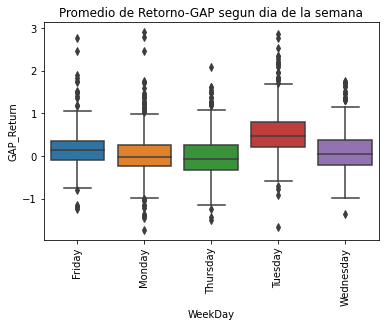

In [21]:
sns.boxplot(data =df_Retorno_Gaps,x='WeekDay',y='GAP_Return')
plt.xticks(rotation=90)
plt.title('Promedio de Retorno-GAP segun dia de la semana')  
plt.show()

In [22]:
dia_inversion_gap=df_retorno_gaps.groupby(['WeekDay']).mean()
#dia_inversion.reset_index(inplace=True)
dia_inversion_gap

,GAP_Return
WeekDay,
Friday,0.000155
Monday,0.000028
Thursday,-0.000007
Tuesday,0.000502
Wednesday,0.000097


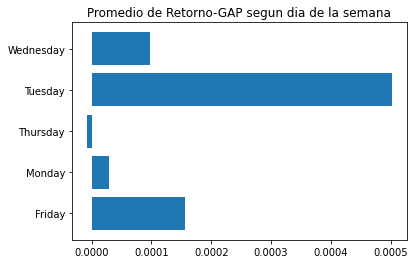

In [23]:
plt.figure()                                #Figura 
x_values1 = dia_inversion_gap.index.tolist()
y_values1 = dia_inversion_gap.GAP_Return.tolist()

plt.barh(x_values1, y_values1)               #El gráfico
plt.title('Promedio de Retorno-GAP segun dia de la semana')              #El título
plt.show()

<Figure size 720x720 with 0 Axes>

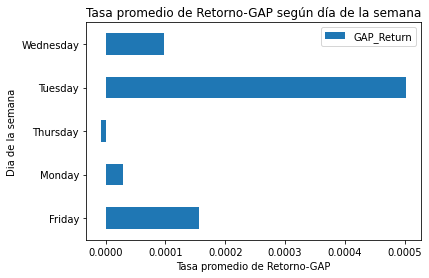

In [24]:
plt.figure(figsize=(10,10))
dia_inversion_gap.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según día de la semana')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Dia de la semana')
plt.show()

# Análisis del mejor día para invertir usando el rendimiento intradiario.
<b>Intra: Considera la diferencia entre el precio de cierre y el precio de apertura (escala logaritmica).

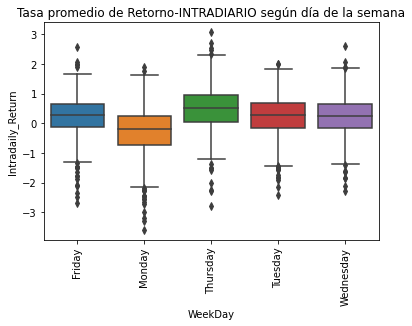

In [25]:
df_Retorno_Intra = df_global[['WeekDay','Ticker','Intradaily_Return']].groupby([df_global['WeekDay'],df_global['Ticker']]).sum()
df_Retorno_Intra.reset_index(inplace=True)
sns.boxplot(data =df_Retorno_Intra,x='WeekDay',y='Intradaily_Return')
plt.xticks(rotation=90)
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.show()

In [26]:
df_retorno_intra= pd.DataFrame()
df_retorno_intra=df_global[['WeekDay','Intradaily_Return']]
df_retorno_intra

,WeekDay,Intradaily_Return
0,Monday,-0.021053
1,Tuesday,0.000000
2,Wednesday,0.010152
3,Thursday,-0.010050
4,Friday,-0.041243
...,...,...
5279,Thursday,-0.003338
5280,Monday,-0.003460
5281,Tuesday,-0.008030
5282,Wednesday,0.009155


In [27]:
dia_inversion_intra=df_retorno_intra.groupby(['WeekDay']).mean()
dia_inversion_intra

,Intradaily_Return
WeekDay,
Friday,0.000215
Monday,-0.000297
Thursday,0.000456
Tuesday,0.000232
Wednesday,0.000206


<Figure size 720x720 with 0 Axes>

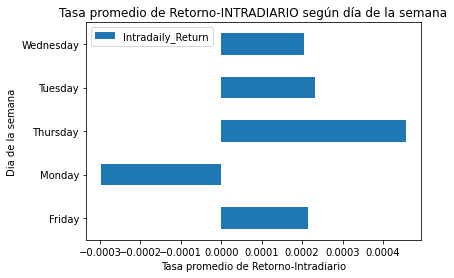

In [28]:
plt.figure(figsize=(10,10))
dia_inversion_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según día de la semana')
plt.xlabel('Tasa promedio de Retorno-Intradiario')
plt.ylabel('Dia de la semana')
plt.show()

In [29]:
df_simbolos=df_simbolos.rename({'Symbol': 'Ticker'},axis=1)
df_simbolos


,Ticker,Security,GICS Sector,GICS Sub-Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment
...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks


In [30]:

df_global_ind= df_global.merge(df_simbolos, on='Ticker', how='left')
df_global_ind

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker,GAP_Return,Intradaily_Return,Variation,Volatility,WeekDay,Year_Month,Security,GICS Sector,GICS Sub-Industry
0,2000-01-03,6.000000,6.125000,5.812500,5.875000,5.875000,138300.0,TYL,0.000000,-0.021053,NaN,NaN,Monday,2000-01,Tyler Technologies,Information Technology,Application Software
1,2000-01-04,6.000000,6.187500,5.937500,6.000000,6.000000,135100.0,TYL,0.021053,0.000000,0.021277,NaN,Tuesday,2000-01,Tyler Technologies,Information Technology,Application Software
2,2000-01-05,6.125000,6.250000,6.062500,6.187500,6.187500,187200.0,TYL,0.020619,0.010152,0.031250,NaN,Wednesday,2000-01,Tyler Technologies,Information Technology,Application Software
3,2000-01-06,6.250000,6.250000,6.000000,6.187500,6.187500,107200.0,TYL,0.010050,-0.010050,0.000000,NaN,Thursday,2000-01,Tyler Technologies,Information Technology,Application Software
4,2000-01-07,6.187500,6.250000,5.750000,5.937500,5.937500,78900.0,TYL,0.000000,-0.041243,-0.040404,NaN,Friday,2000-01,Tyler Technologies,Information Technology,Application Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2658350,2020-12-24,72.019997,72.019997,70.800003,71.779999,69.066010,665800.0,STT,0.006128,-0.003338,0.002794,58.719356,Thursday,2020-12,State Street Corporation,Financials,Asset Management & Custody Banks
2658351,2020-12-28,72.370003,72.889999,71.449997,72.120003,69.393150,1738900.0,STT,0.008186,-0.003460,0.004737,58.719796,Monday,2020-12,State Street Corporation,Financials,Asset Management & Custody Banks
2658352,2020-12-29,72.519997,72.809998,71.730003,71.940002,69.219955,1168700.0,STT,0.005531,-0.008030,-0.002496,58.684184,Tuesday,2020-12,State Street Corporation,Financials,Asset Management & Custody Banks
2658353,2020-12-30,71.760002,72.919998,71.760002,72.419998,69.681801,909900.0,STT,-0.002505,0.009155,0.006672,58.668046,Wednesday,2020-12,State Street Corporation,Financials,Asset Management & Custody Banks


In [31]:
df_emp_r_gaps= pd.DataFrame()

df_emp_r_gaps=df_global_ind[['GICS Sector','GAP_Return']]
df_emp_r_gaps

,GICS Sector,GAP_Return
0,Information Technology,0.000000
1,Information Technology,0.021053
2,Information Technology,0.020619
3,Information Technology,0.010050
4,Information Technology,0.000000
...,...,...
2658350,Financials,0.006128
2658351,Financials,0.008186
2658352,Financials,0.005531
2658353,Financials,-0.002505


In [32]:
df_emp_r_gaps =df_emp_r_gaps.groupby(['GICS Sector']).mean()
df_emp_r_gaps = df_emp_r_gaps.sort_values('GAP_Return',ascending=True)
df_emp_r_gaps

,GAP_Return
GICS Sector,
Consumer Staples,-0.000083
Utilities,0.000011
Real Estate,0.000054
Industrials,0.000118
Financials,0.000120
Health Care,0.000156
Information Technology,0.000169
Materials,0.000224
Communication Services,0.000226


<Figure size 720x720 with 0 Axes>

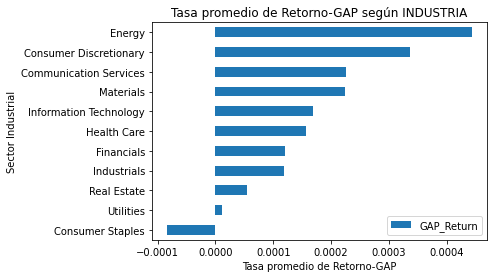

In [33]:
plt.figure(figsize=(10,10))
df_emp_r_gaps.plot.barh()
plt.title('Tasa promedio de Retorno-GAP según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-GAP')
plt.ylabel('Sector Industrial')
plt.show()

In [34]:
df_emp_r_intra= pd.DataFrame()

df_emp_r_intra=df_global_ind[['GICS Sector','Intradaily_Return']]
df_emp_r_intra

,GICS Sector,Intradaily_Return
0,Information Technology,-0.021053
1,Information Technology,0.000000
2,Information Technology,0.010152
3,Information Technology,-0.010050
4,Information Technology,-0.041243
...,...,...
2658350,Financials,-0.003338
2658351,Financials,-0.003460
2658352,Financials,-0.008030
2658353,Financials,0.009155


In [35]:
df_emp_r_intra =df_emp_r_intra.groupby(['GICS Sector']).mean()
df_emp_r_intra = df_emp_r_intra.sort_values('Intradaily_Return',ascending=True)
df_emp_r_intra

,Intradaily_Return
GICS Sector,
Energy,-0.000297
Communication Services,0.000032
Materials,0.000050
Consumer Discretionary,0.000101
Financials,0.000120
Information Technology,0.000196
Utilities,0.000200
Real Estate,0.000206
Industrials,0.000242


<Figure size 720x720 with 0 Axes>

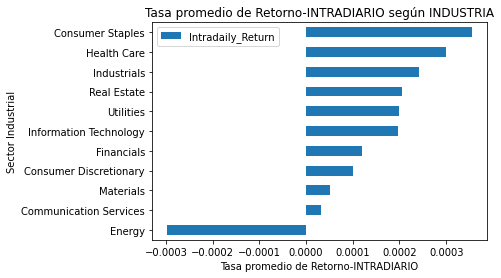

In [36]:
plt.figure(figsize=(10,10))
df_emp_r_intra.plot.barh()
plt.title('Tasa promedio de Retorno-INTRADIARIO según INDUSTRIA')
plt.xlabel('Tasa promedio de Retorno-INTRADIARIO')
plt.ylabel('Sector Industrial')
plt.show()

In [37]:
df_volatibilidades=pd.DataFrame
df_volatibilidades= df_global[['Year_Month','Volatility']]
df_volatibilidades = df_volatibilidades.sort_values('Volatility',ascending=False)
df_volatibilidades

,Year_Month,Volatility
2432,2009-09,214.222150
2431,2009-09,213.994076
2430,2009-09,213.990566
2435,2009-09,213.760655
2434,2009-09,213.593333
...,...,...
245,2000-12,NaN
246,2000-12,NaN
247,2000-12,NaN
248,2000-12,NaN


In [38]:
df_volatibilidades_por_periodo=df_volatibilidades.groupby(['Year_Month']).mean()
df_volatibilidades_por_periodo = df_volatibilidades_por_periodo.sort_values('Volatility',ascending=False)
df_volatibilidades_por_periodo

,Volatility
Year_Month,
2009-06,70.404261
2009-07,69.984873
2009-05,69.963381
2009-08,69.494807
2009-04,68.581948
...,...
2000-07,NaN
2000-08,NaN
2000-09,NaN


In [39]:
df_volatilidades_altas_periodos=df_volatibilidades_por_periodo.head(15)

In [40]:
df_volatilidades_altas_periodos

,Volatility
Year_Month,
2009-06,70.404261
2009-07,69.984873
2009-05,69.963381
2009-08,69.494807
2009-04,68.581948
2009-09,68.386643
2009-03,66.428755
2009-02,64.056834
2009-10,62.767799


<Figure size 720x720 with 0 Axes>

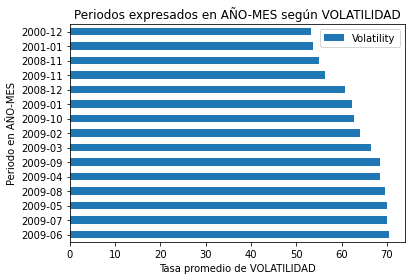

In [41]:
plt.figure(figsize=(10,10))
df_volatilidades_altas_periodos.plot.barh()
plt.title('Periodos expresados en AÑO-MES según VOLATILIDAD')
plt.xlabel('Tasa promedio de VOLATILIDAD')
plt.ylabel('Periodo en AÑO-MES')
plt.show()

In [55]:
df_data.columns
tickers=df_data.columns.get_level_values(0)
tickers=tickers.unique()

In [70]:
tickers

Index(['TYL', 'IEX', 'ADP', 'HAS', 'QRVO', 'AOS', 'VFC', 'DHI', 'WAB', 'BRK-B',
       ...
       'PVH', 'HOLX', 'FOX', 'IBM', 'WEC', 'DXCM', 'SLB', 'DOV', 'MRK', 'STT'],
      dtype='object', length=503)

In [96]:
df_TYL=df_data.loc[:,'TYL']
df_TYL.reset_index(inplace=True)

df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
df_TYL.set_index(['Date'],inplace=True)

#df_TYL=df_TYL['Adj Close']

df_TYL

C:\Users\Diana\AppData\Local\Temp\ipykernel_9172\2417216141.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.rename(columns={'Adj Close':'TYL'},inplace=True)
C:\Users\Diana\AppData\Local\Temp\ipykernel_9172\2417216141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TYL.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)


,TYL
Date,
2000-01-03,5.875000
2000-01-04,6.000000
2000-01-05,6.187500
2000-01-06,6.187500
2000-01-07,5.937500
...,...
2020-12-28,431.929993
2020-12-29,429.369995
2020-12-30,428.929993


# Comprender el precio de cierre ajustado
Los valores de las acciones se expresan en términos del precio de cierre y el precio de cierre ajustado. El precio de cierre es el precio sin procesar, que es solo el valor en efectivo del último precio negociado antes del cierre del mercado. El precio de cierre ajustado tiene en cuenta cualquier cosa que pueda afectar el precio de las acciones después del cierre del mercado.

In [148]:
list_tickers=[]
df_empresas=pd.DataFrame
for i in tickers:
    df_AdjClose_tickers=df_data.loc[:,i]
    df_AdjClose_tickers.reset_index(inplace=True)
    df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
    df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
    df_AdjClose_tickers.set_index(['Date'],inplace=True)
    
    list_tickers.append(df_AdjClose_tickers)
df_empresas=list_tickers[0]
df_empresas
    





C:\Users\Diana\AppData\Local\Temp\ipykernel_9172\2500842419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.rename(columns={'Adj Close':i},inplace=True)
C:\Users\Diana\AppData\Local\Temp\ipykernel_9172\2500842419.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_AdjClose_tickers.drop(columns={'Open','High','Low','Close','Volume'},inplace=True)
C:\Users\Diana\AppData\Local\Temp\ipykernel_9172\2500842419.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,TYL
Date,
2000-01-03,5.875000
2000-01-04,6.000000
2000-01-05,6.187500
2000-01-06,6.187500
2000-01-07,5.937500
...,...
2020-12-28,431.929993
2020-12-29,429.369995
2020-12-30,428.929993


In [149]:
df_global_empresa2=df_empresas

In [150]:
i=1
while i<503:
    df_global_empresa2= df_global_empresa2.merge(list_tickers[i], how='left', left_index=True, right_index=True)
    i=i+1

In [151]:
df_global_empresa2

,TYL,IEX,ADP,HAS,QRVO,AOS,VFC,DHI,WAB,BRK-B,...,PVH,HOLX,FOX,IBM,WEC,DXCM,SLB,DOV,MRK,STT
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,5.875000,9.533323,25.725374,10.882905,NaN,2.417521,3.899583,2.718050,7.995790,35.299999,...,7.048486,1.500000,NaN,65.637459,4.652171,NaN,18.048101,19.168127,28.033066,24.285746
2000-01-04,6.000000,9.099091,25.725374,10.181974,NaN,2.382689,3.858450,2.615482,7.879485,34.080002,...,6.766547,1.421875,NaN,63.409477,4.682678,NaN,17.801704,18.813158,27.048546,22.936527
2000-01-05,6.187500,9.059616,25.478006,9.702381,NaN,2.375722,3.817313,2.653944,7.850418,34.639999,...,6.653770,1.500000,NaN,65.637459,4.896220,NaN,17.760653,18.895075,28.110786,23.350000
2000-01-06,6.187500,9.059616,25.818129,9.444146,NaN,2.340887,3.759724,2.512914,7.530582,36.080002,...,6.822934,1.484375,NaN,64.505760,4.880968,NaN,18.972061,18.976992,28.343969,24.329262
2000-01-07,5.937500,9.316207,26.405600,9.776168,NaN,2.438424,3.841995,2.602661,7.239826,36.400002,...,6.653770,1.546875,NaN,64.222870,4.941980,NaN,19.321115,19.495779,31.064373,25.199718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-28,431.929993,192.894089,171.642899,89.378326,166.440002,54.241497,81.660454,69.383896,71.949081,228.410004,...,94.781219,72.580002,28.334366,110.916718,86.511803,90.577499,21.056835,121.811470,72.826111,69.393150
2020-12-29,429.369995,192.224564,169.951843,89.416641,163.770004,53.354046,81.001068,68.979797,71.532784,229.570007,...,93.313210,71.739998,28.241161,110.010330,86.349258,89.224998,20.871353,121.056770,73.704193,69.219955
2020-12-30,428.929993,193.602997,168.921646,90.010330,167.369995,53.354046,82.329414,69.107933,71.760757,229.649994,...,95.390388,71.750000,28.157768,110.490181,86.578743,90.692497,21.359463,121.958488,72.952850,69.681801


In [153]:
mean_returns=mean_historical_return(df_global_empresa2,frequency=252)


In [162]:
mean_returns_ordered=mean_returns.sort_values(ascending=False)
empresas_recomendadas=mean_returns_ordered[:9]
empresas_recomendadas

CARR    3.284406
MRNA    1.374071
PAYC    0.652737
OTIS    0.651704
SEDG    0.606537
TSLA    0.606513
CDAY    0.573045
CZR     0.569485
NOW     0.440742
dtype: float64

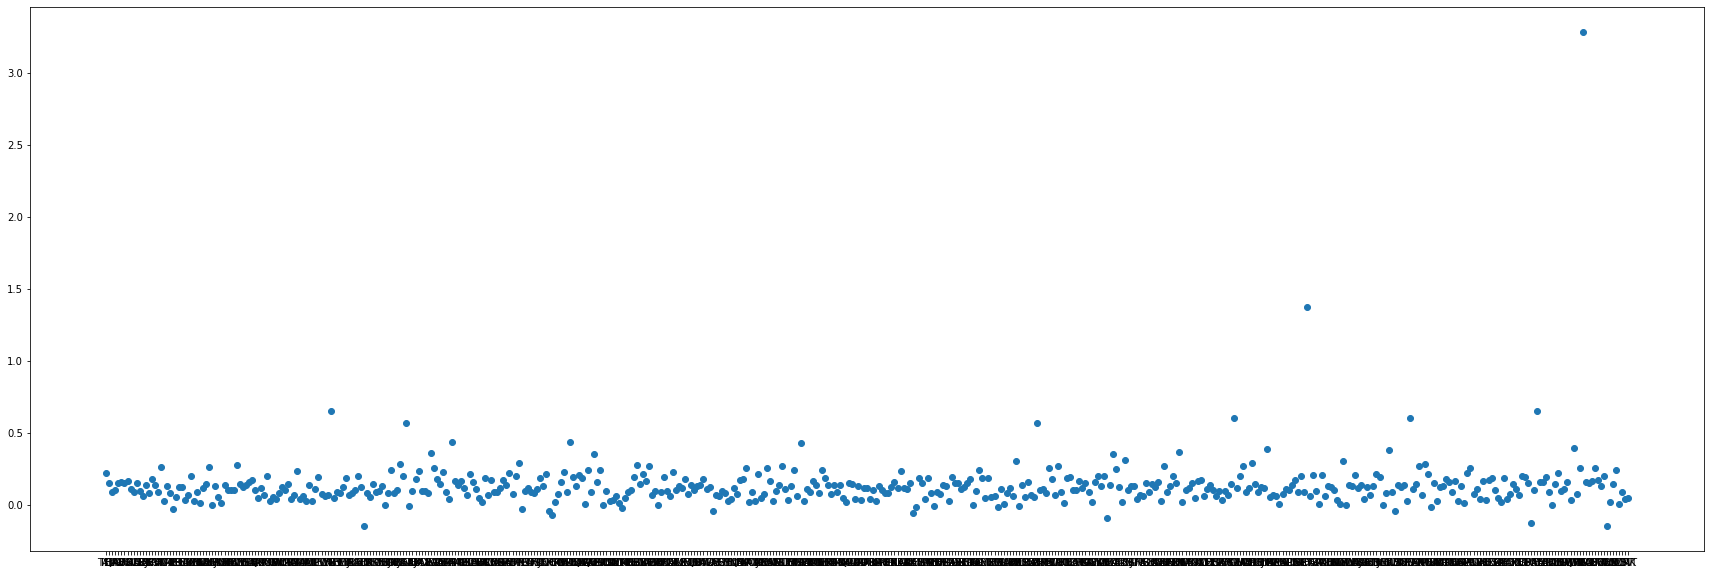

In [156]:
plt.figure(figsize=(30,10))
plt.plot(mean_returns,linestyle='None',marker='o')
plt.show()

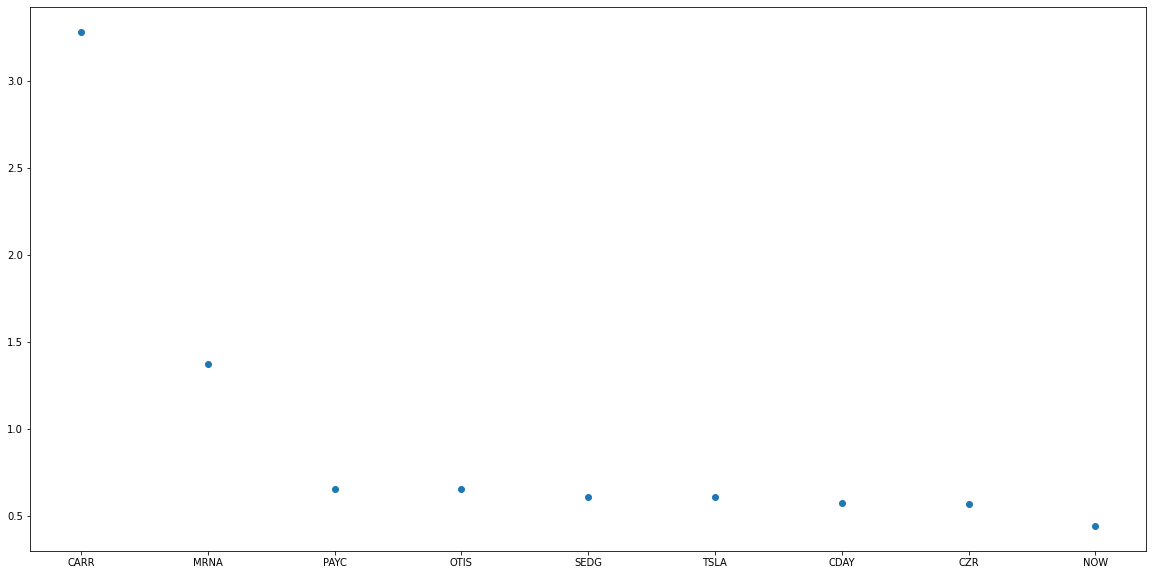

In [163]:
plt.figure(figsize=(20,10))
plt.plot(empresas_recomendadas,linestyle='None',marker='o')
plt.show()

In [165]:
lista_recomendadas=empresas_recomendadas.index
lista_recomendadas=lista_recomendadas.tolist()
lista_recomendadas

['CARR', 'MRNA', 'PAYC', 'OTIS', 'SEDG', 'TSLA', 'CDAY', 'CZR', 'NOW']

Las 9 mejpores empresas para invertir son:
  -  Carrier Global
  - Moderna,
  - Paycom
  - Otis Worldwide,
  - SolarEdge,
  - Tesla, Inc.,
  - Ceridian,
  - Caesars Entertainment,
  - ServiceNow